In [4]:
#Implementing neural networks with Keras and TensorFlow for Image Classification Problem a. Import the necessary packages b. Load the training and testing data (MNIST) c. Define the network architecture using Keras d. Train the model using SGD e. Evaluate the network f. Plot the training loss and accuracy

#importing necessary libraries
import tensorflow as tf
from tensorflow import keras
from keras import datasets, layers, models
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
%matplotlib inline

In [2]:
#import dataset and split into train and test data
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
#to see length of training dataset
len(x_train)

60000

In [5]:
#to see length of training dataset
len(x_train)

60000

In [6]:
#shape of training dataset 60,000 images having 28*28 size
x_train.shape

(60000, 28, 28)

In [7]:
#shape of testing dataset 10,000 images having 28*28 size
x_test.shape

(10000, 28, 28)

In [8]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

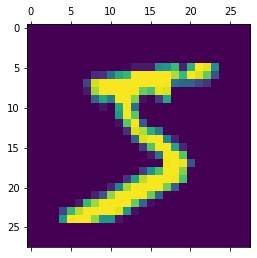

In [9]:
#to see how first image look
plt.matshow(x_train[0])

In [10]:
#normalize the images by scaling pixel intensities to the range 0,1
x_train = x_train / 255
x_test = x_test / 255

In [11]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [12]:
x_train = x_train.reshape(-1,28,28,1)
x_train.shape

(60000, 28, 28, 1)

In [13]:
x_test = x_test.reshape(-1,28,28,1)
x_test.shape

(10000, 28, 28, 1)

In [14]:
model = keras.Sequential([
  layers.Conv2D(30, (3,3), activation='relu', input_shape=(28, 28, 1)),
  layers.MaxPooling2D((2,2)),
  layers.Flatten(),
  layers.Dense(100, activation='relu'),
  keras.layers.Dense(10, activation='sigmoid')
])

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 30)        300       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 30)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 5070)              0         
                                                                 
 dense (Dense)               (None, 100)               507100    
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 508,410
Trainable params: 508,410
Non-trainable params: 0
__________________________________________________

In [16]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [17]:
history=model.fit(x_train, y_train,validation_data=(x_test,y_test),epochs=10)

Epoch 1/10
1875/1875 [==============================] - 47s 25ms/step - loss: 0.1658 - accuracy: 0.9510 - val_loss: 0.0604 - val_accuracy: 0.9822
Epoch 2/10
1875/1875 [==============================] - 45s 24ms/step - loss: 0.0558 - accuracy: 0.9836 - val_loss: 0.0505 - val_accuracy: 0.9832
Epoch 3/10
1875/1875 [==============================] - 44s 23ms/step - loss: 0.0378 - accuracy: 0.9886 - val_loss: 0.0513 - val_accuracy: 0.9833
Epoch 4/10
1875/1875 [==============================] - 45s 24ms/step - loss: 0.0262 - accuracy: 0.9918 - val_loss: 0.0462 - val_accuracy: 0.9855
Epoch 5/10
1875/1875 [==============================] - 41s 22ms/step - loss: 0.0182 - accuracy: 0.9941 - val_loss: 0.0427 - val_accuracy: 0.9872
Epoch 6/10
1875/1875 [==============================] - 41s 22ms/step - loss: 0.0131 - accuracy: 0.9958 - val_loss: 0.0495 - val_accuracy: 0.9865
Epoch 7/10
1875/1875 [==============================] - 41s 22ms/step - loss: 0.0092 - accuracy: 0.9971 - val_loss: 0.0634 -

In [18]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 3s 8ms/step - loss: 0.0500 - accuracy: 0.9882


[0.049958232790231705, 0.9882000088691711]

In [26]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

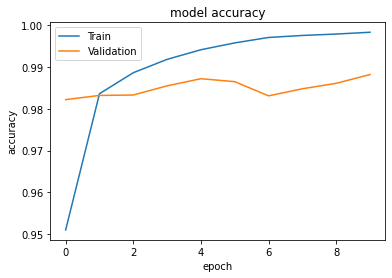

In [27]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

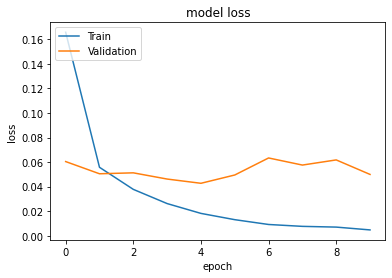

In [28]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

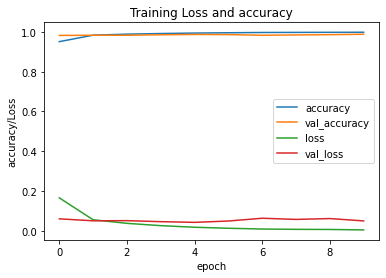

In [29]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training Loss and accuracy')
plt.ylabel('accuracy/Loss')
plt.xlabel('epoch')
plt.legend(['accuracy', 'val_accuracy','loss','val_loss'])
plt.show()